# Contents
- [Data Review](#1)
- [Data Visualization](#2)
- [Classifications Models ](#3)
    - [Data Preparing](#cm1)
    - [Decision Tree Classifier](#cm2)
    - [Random Forest Classifier](#cm3)
    - [Evaluation Classification Models](#cm4)
        - [Confusion Matrix](#cm4-1)


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Review <a id = "1"></a>

In [6]:
data = pd.read_csv("drug200.csv")

In [7]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [8]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
# Dataset Values(Max, min, std..)
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
# Data Correlation: 데이터프레임의 모든 '숫자형' 열 간의 상관계수 계산 - Age, Na_to_K
# 향후 판다스 버전에서는 데이터 유형 관계없이 계산함
data.corr()

/var/folders/0z/kd5trm852nd1x2rm_j9n6t000000gn/T/ipykernel_53176/1020695975.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


/var/folders/0z/kd5trm852nd1x2rm_j9n6t000000gn/T/ipykernel_53176/3588331914.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)


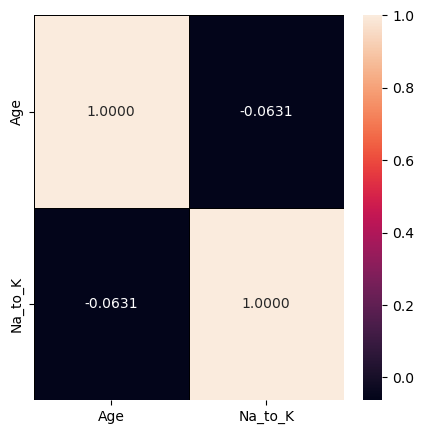

In [11]:
# seaborn 히트맵 이용해 시각화
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

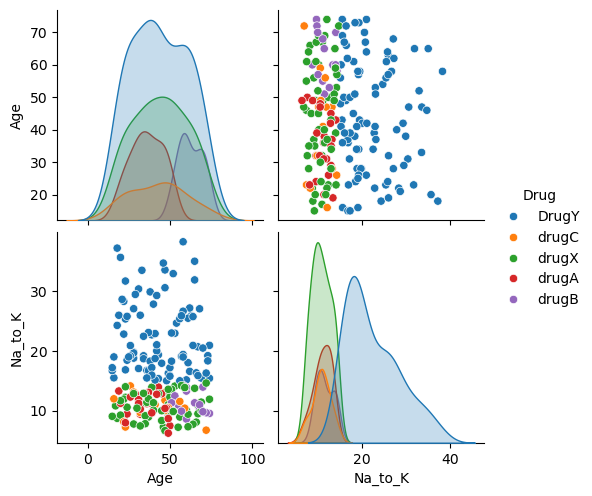

In [12]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(data, hue = "Drug")

# drug 열의 값에 따라 데이터 포인트의 색상을 다르게 표시해서, 수치형 변수 쌍에 대해 '산점도'를 그림!

In [13]:
# Dataset columns names
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

#### column 내부에 있는 데이터 값 확인하기

In [14]:
# Data in the age column
data["Age"].value_counts(dropna=False)

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

****

In [15]:
# Data in the Sex column
data["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

****

In [16]:
# Data in the BP(Blood Pressure Levels) column
data["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

****

In [17]:
# Data in the Cholesterol column
data["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

****

In [18]:
# Data in the Drug column
data["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

I finished the data review chapter. I reviewed the data and I visualized some data in the data visualization chapter. I will use a different library in the data visualization chapter this time.

# Data Visualization <a id = "2"></a>

#### Apply plotly library to the dataset. (go, px)
plotly 라이브러리: 데이터 분석 결과를 공유하거나 대시보드 생성에 유용함 (동적 시각화 구현!)
- 인터랙티브 시각화
- 다양한 차트 유형
- 웹 기반 최적화
- 데이터 대용량 처리

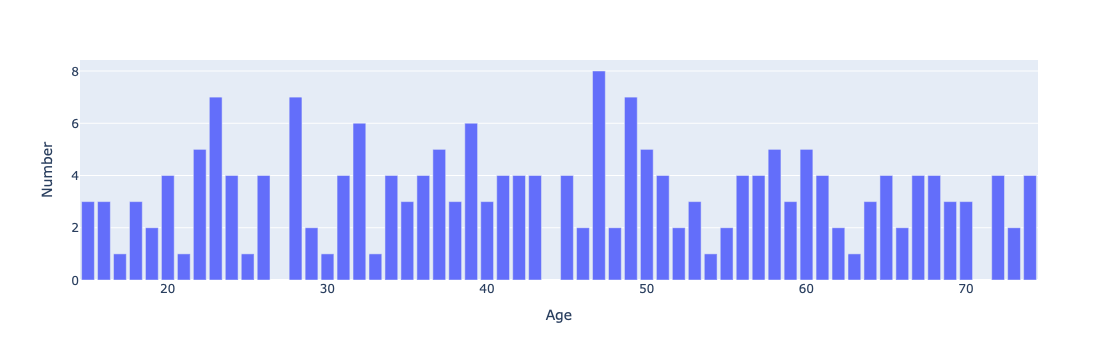

In [19]:
# age 시각화
dataAge = data["Age"].value_counts(dropna = False) # 각 고유 나이값의 출현 횟수 계산
npar_dataAge = np.array(dataAge) 
x = list(npar_dataAge) # 넘파이 배열을 리스트로 변환해 각 나이별 개수 표현
y = data.Age.value_counts().index

DataAge = {"Age": y, "Number": x}
DataAge = pd.DataFrame(DataAge)

fig = px.bar(DataAge, x = "Age", y = "Number")
fig.show()

In [20]:
# 성별 수 시각화
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data = [go.Pie(labels= ['M', 'F'], values=[104, 96])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = colors, line = dict( color = '#000000', width = 2)))

fig.show()

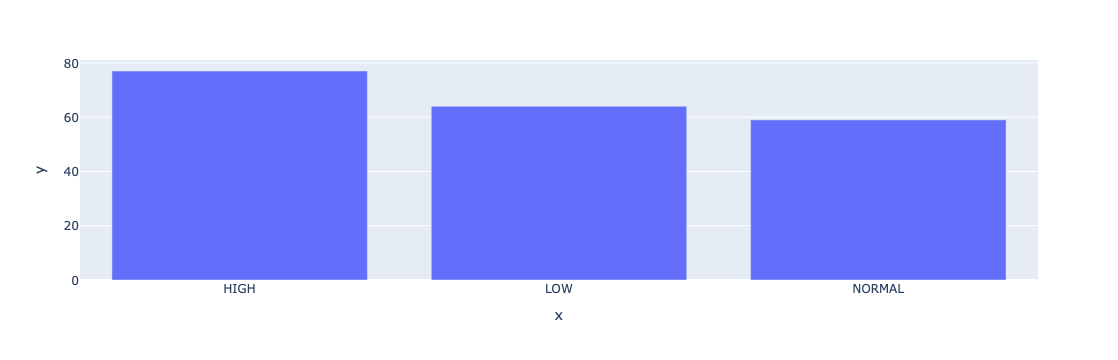

In [21]:
# 혈압 레벨 시각화
fig = px.bar(x = ["HIGH", "LOW", "NORMAL"], y = [77, 64, 59])

fig.show()

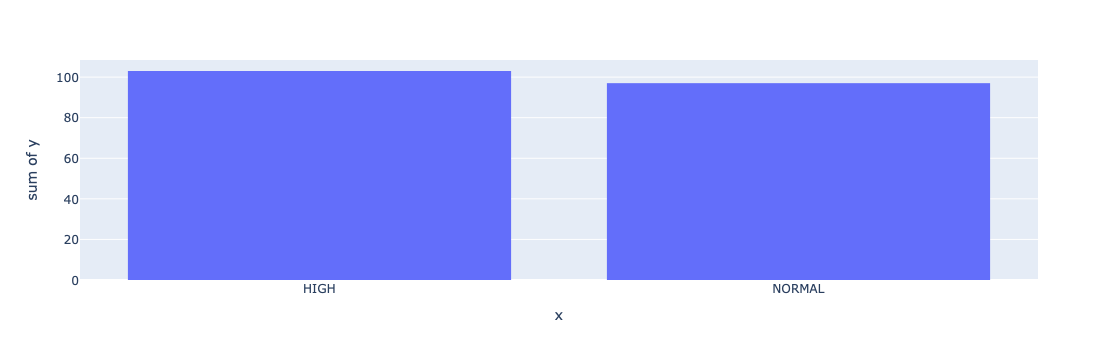

In [22]:
# 콜레스테롤 히스토그램으로 시각화
fig = px.histogram(x = ["HIGH", "NORMAL"], y = [103, 97])
fig.show()

**bar: 범주형 데이터, histogram: 연속형 데이터 표현에 적절** <br>
둘 다 막대 그래프 모양인데 무슨 차이지? 

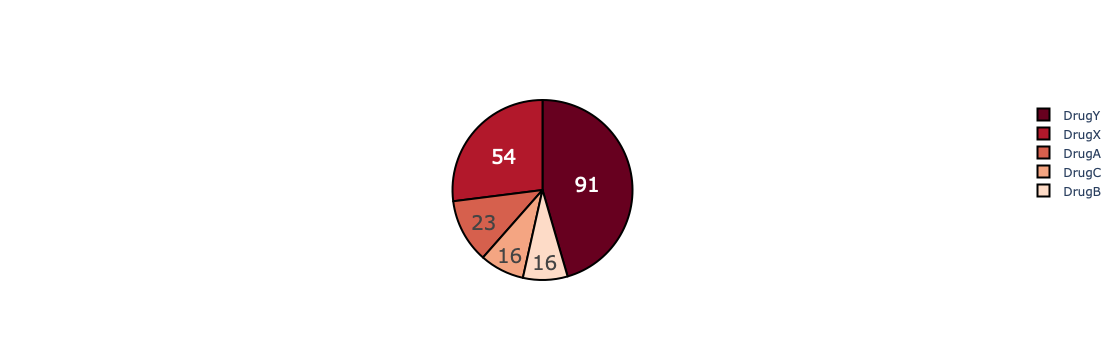

In [23]:
# 약의 개수 시각화
fig = go.Figure(data = [go.Pie(labels=["DrugY","DrugX","DrugA","DrugC","DrugB"], values=[91,54,23,16,16])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = px.colors.sequential.RdBu, line = dict( color = '#000000', width = 2)))

fig.show()

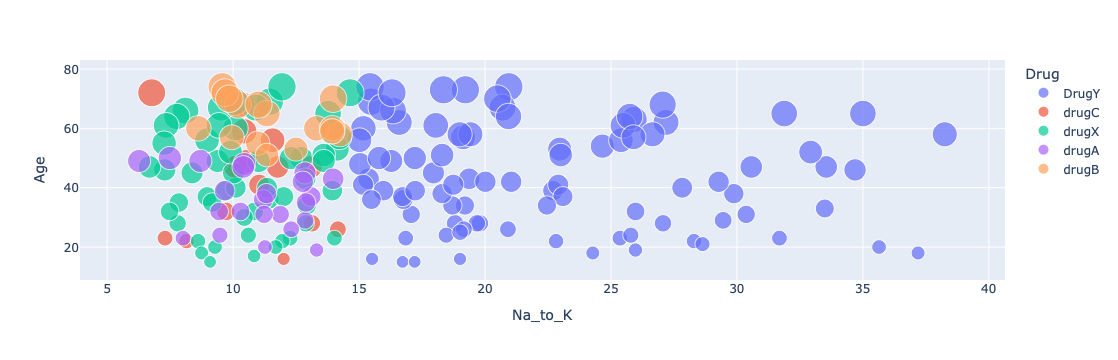

In [24]:
# age <-> Na_To_K(Na to Potassium Ration) 관계
fig = px.scatter(data, x = "Na_to_K", y="Age", color="Drug",
                 size='Age', hover_data=['Na_to_K'])
fig.show()

# Classifications Models <a id = "3"></a>

## Data Preparing <a id = "cm1"></a>

In [25]:
dataclass = pd.read_csv("drug200.csv")

In [26]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [27]:
# object 타입 없애기
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [28]:
# Sex 값(F, M)를 1, 0 값으로 변경
# F = 1
# M = 0
dataclass.Sex = [1 if i == "F" else 0 for i in dataclass.Sex]

In [29]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,DrugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [30]:
# Change BP(Blood Pressure Levels) type
# LOW = 2
# NORMAL = 1
# HIGH = 0

import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(dataclass.BP)):
    if dataclass.BP[i] == "LOW":
        dataclass.BP[i] = 2
        
    elif dataclass.BP[i] == "NORMAL":
        dataclass.BP[i] = 1
        
    else:
        dataclass.BP[i] = 0

In [31]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,DrugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,HIGH,11.567,drugC
196,16,0,2,HIGH,12.006,drugC
197,52,0,1,HIGH,9.894,drugX
198,23,0,1,NORMAL,14.020,drugX


In [32]:
# Change Cholesterol type.
# HIGH = 1
# NORMAL = 0
dataclass.Cholesterol = [1 if i == "HIGH" else 0 for i in dataclass.Cholesterol]

In [33]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,DrugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,1,1,9.894,drugX
198,23,0,1,0,14.020,drugX


In [34]:
# Change Drug type.
# DrugY = 4
# DrugX = 3
# DrugA = 2
# DrugC = 1
# DrugB = 0

import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(dataclass)):
    if dataclass.Drug[i] == "DrugY":
        dataclass.Drug[i] = 4
    elif dataclass.Drug[i] == "drugX":
        dataclass.Drug[i] = 3
    elif dataclass.Drug[i] == "drugA":
        dataclass.Drug[i] = 2
    elif dataclass.Drug[i] == "drugC":
        dataclass.Drug[i] = 1
    else:
        dataclass.Drug[i] = 0

In [35]:
# 최종
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,4
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,4
...,...,...,...,...,...,...
195,56,1,2,1,11.567,1
196,16,0,2,1,12.006,1
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [36]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


In [37]:
# BP, Drug가 아직도 object type
data_types_dict = {'BP': int, "Drug": int}

dataclass = dataclass.astype(data_types_dict)

dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [38]:
# x_data
x_data = dataclass.drop(["Drug"], axis = 1)

#y_data: dataclass에서 Drug 컬럼을 드롭했음. 이 값을 y_data에 따로 저장.
y_data = dataclass.Drug.values 

In [39]:
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,1,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [40]:
y_data

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [41]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

## Decision Tree Classifier <a id = "cm2"></a>

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier()

# 모델 학습 
dtc.fit(x_train, y_train)

# 예측
predict = dtc.predict(x_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(predict,y_test))

The accuracy of the Decision Tree is 0.9666666666666667


### Decision Tree Classifier with "gini"

**지니 불순도는 데이터가 얼마나 균일하지 않은지를 측정** <br>
결정 트리는 노드를 나눌 때, 분할 후 생성되는 자식 노드들의 지니 불순도의 합이 가장 작아지게 만드는 특성(feature)과 분할 기준을 선택함. 지니 불순도가 0인 상태(예: 노드의 데이터가 모두 'DrugY' 또는 모두 'drugX'인 상태)가 가장 이상적인 상태이며, 트리는 최종적으로 이러한 순수한 노드(리프 노드)를 만드는 것을 목표로 한다. 

In [43]:
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# Fit the model
DTC_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [44]:
y_pred_gini = DTC_gini.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9000


In [46]:
y_pred_train_gini = DTC_gini.predict(x_train)

y_pred_train_gini

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [47]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9143


In [48]:
# Print the scores on training and test set

print('Training set score: {:.4f}'.format(DTC_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_gini.score(x_test, y_test)))

Training set score: 0.9143
Test set score: 0.9000


### Decision Tree Classifier with "entropy"

**엔트로피: 특정 데이터 세트(노드) 내의 불확실성(Uncertainty) 또는 무작위성** <br>
엔트로피 값이 높을수록 데이터가 여러 클래스로 혼합되어 불순하다는 의미이며, 결정 트리는 데이터를 분할할 때 엔트로피를 최대한 낮추는 방향으로 노드를 나눔

In [49]:
DTC_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

DTC_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [50]:
y_pred_en = DTC_en.predict(x_test)

In [51]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9000


In [52]:
y_pred_train_en = DTC_en.predict(x_train)

y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9143


In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(DTC_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_en.score(x_test, y_test)))

Training set score: 0.9143
Test set score: 0.9000


## Random Forest Classifier 

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

# 학습 및 예측
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.95


### Random Forest Classifier with "n_estimators=100"

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# 학습 및 예측
rfc_100.fit(x_train, y_train)
predict = rfc_100.predict(x_test)

# 정확도
print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.95


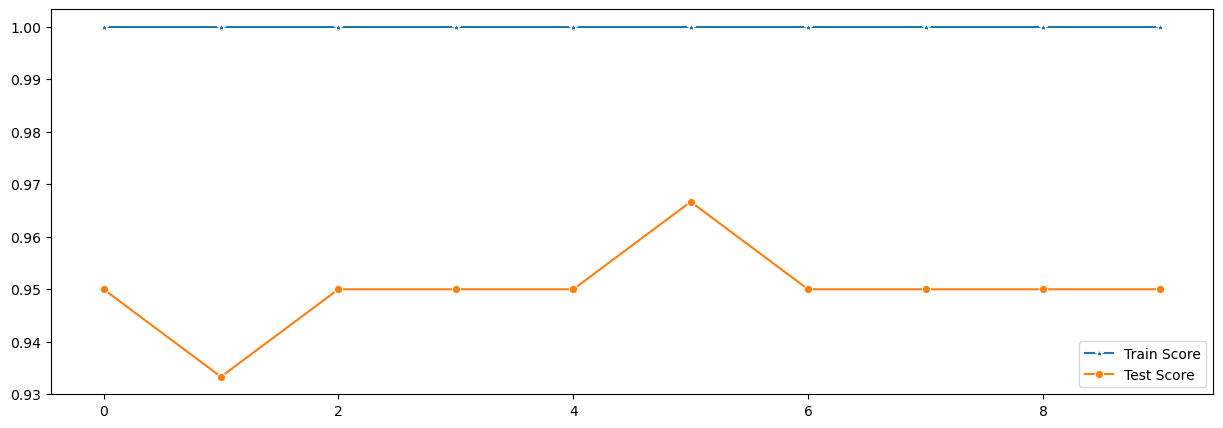

In [57]:
# 최적의 random_state 값 찾기
test_score_list = []
train_score_list = []

for i in range(0,10):
    rfc2 = RandomForestClassifier(random_state=i)
    rfc2.fit(x_train, y_train)
    test_score_list.append(rfc2.score(x_test, y_test))
    train_score_list.append(rfc2.score(x_train, y_train))
    
plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(0,10), y=train_score_list, marker='*', label='Train Score')  # 버전에 따른 수정
p = sns.lineplot(x=range(0,10), y=test_score_list, marker='o', label='Test Score')

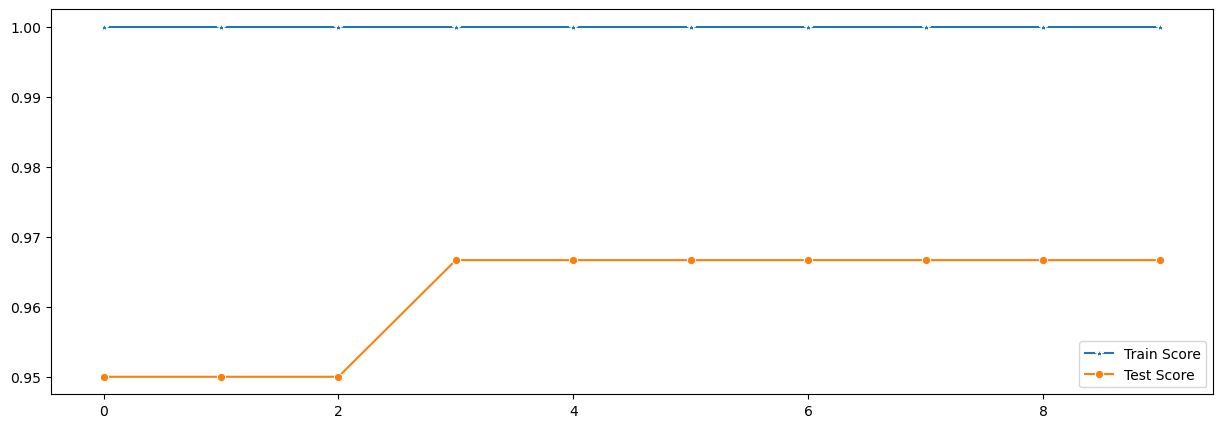

In [58]:
# 위 그래프에서 5가 최적의 random_state 값임을 알 수 있음

# n_estimator 값 찾기 (트리 개수)
test_score_list = []
train_score_list = []

list_n_estimators = [10,20,30,40,50,60,70,80,90,100] # 10개부터 100개까지 10개 단위로 트리 개수 정의, 반복문 돌며 최적값 찾기 


for i in range(0,len(list_n_estimators)):
    rfc3 = RandomForestClassifier(n_estimators=list_n_estimators[i], random_state=5)
    rfc3.fit(x_train, y_train)
    test_score_list.append(rfc3.score(x_test, y_test))
    train_score_list.append(rfc3.score(x_train, y_train))
    
plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(0,len(list_n_estimators)),y=train_score_list,marker='*',label='Train Score')
p = sns.lineplot(x=range(0,len(list_n_estimators)),y=test_score_list,marker='o',label='Test Score')

### Random Forest Classifier With The Best Parameters

In [71]:
last_rfc = RandomForestClassifier(n_estimators=100, random_state=5)

# 학습 및 예측
last_rfc.fit(x_train,y_train)
predict = last_rfc.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.9666666666666667


In [72]:
y_pred_en = last_rfc.predict(x_test)

In [73]:
print('Model accuracy score with best parameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with best parameters: 0.9667


In [74]:
y_pred_train_en = last_rfc.predict(x_train)

y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 1, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 1, 3, 2, 3, 4, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3,
       1, 0, 0, 2, 4, 3, 4, 1, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 1, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 2, 3, 1, 1, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [75]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [76]:
# 최적의 파라미터 값으로 학습시킨 데이터의 성능
print('Training set score: {:.4f}'.format(last_rfc.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(last_rfc.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9667


## Evaluation Classification Models <a id = "cm4"></a>
**머신러닝 모델의 성능 측정하기**

### Confusion Matrix 혼동 행렬 <a id = "cm4-1"></a>

**What is The Confusion Matrix?**<br>
이진 분류기의 예측 결과를 표 형식으로 나타낸 것으로, 참값이 알려져 있을 때 테스트 데이터 세트에서 분류 모델의 성능을 설명

#### Confusion Matrix For DecisionTreeClassifier Without Parameters

In [77]:
# For Desicion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cm_des = DecisionTreeClassifier()


cm_des.fit(x_train,y_train)
y_pred_cm = cm_des.predict(x_test)
y_true = y_test

cm_des1 = confusion_matrix( y_true, y_pred_cm)
cm_des1

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

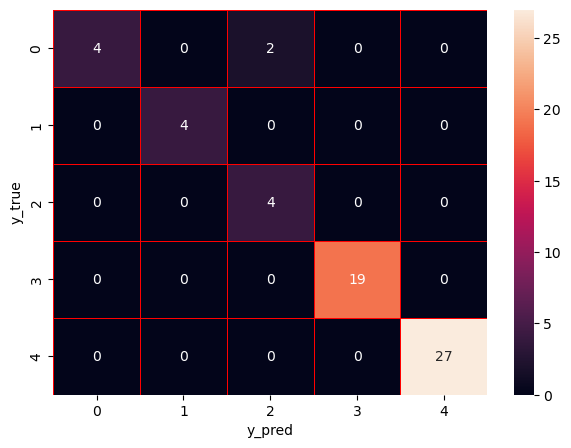

In [66]:
f, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des1, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Confusion Matrix For Decision Tree Classifier With "gini" 

In [67]:
cm_des_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
cm_des_gini.fit(x_train,y_train)

y_pred_cm = cm_des_gini.predict(x_test)
y_true = y_test

cm_des2 = confusion_matrix( y_true, y_pred_cm)
cm_des2

array([[ 4,  0,  2,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

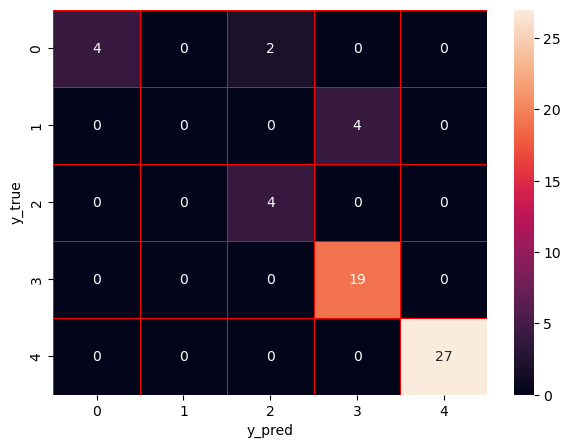

In [68]:
f, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des2, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Confusion Matrix For Random Forest Classifier With The Best Parameters

In [78]:
cm_last_rfc = RandomForestClassifier(n_estimators=100, random_state=5)
cm_last_rfc.fit(x_train, y_train)
y_pred_cm = cm_last_rfc.predict(x_test)
y_true = y_test

cm_rfc = confusion_matrix(y_true, y_pred_cm)
cm_rfc

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

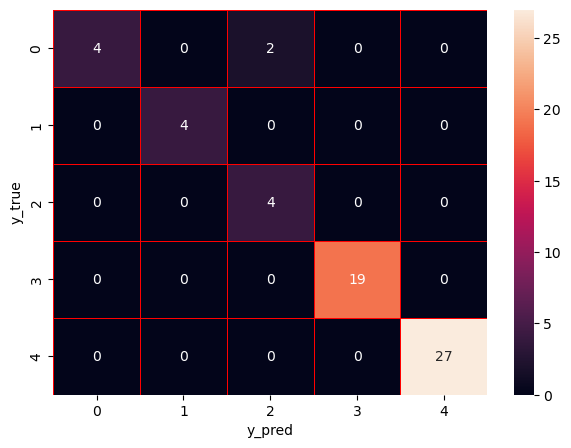

In [70]:
f, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_rfc, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()